<a href="https://colab.research.google.com/github/TommasoStrada/Progetto-Data-Science-Lab/blob/main/Prophet/Prophet_Casual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#@title
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### Importa librerie

In [85]:
#@title
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
py.init_notebook_mode()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

## Valori di MAPE e MAE:
##**Annuale =  36.92 ; 2830917.551147114**
##**Trimestrale =  63.94; 418072.08859253797**
##**Mensile = 50.68; 112303.47062983594**
##**Settimanale =  59.92; 26009.41461243502**

## Annuale Pesca

In [86]:
pesca = pd.read_csv ('casual_annuale.csv')
pesca = pesca[pesca['year']<2022]
pesca.head(2)

Unnamed: 0  year     revenue
0           0  2014  1959710.58
1           1  2015  4202764.36

**Dividiamo in test e train set** 

In [87]:
steps = 2

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

Unnamed: 0    ds           y
6           6  2020  8190939.82
7           7  2021  7506147.47

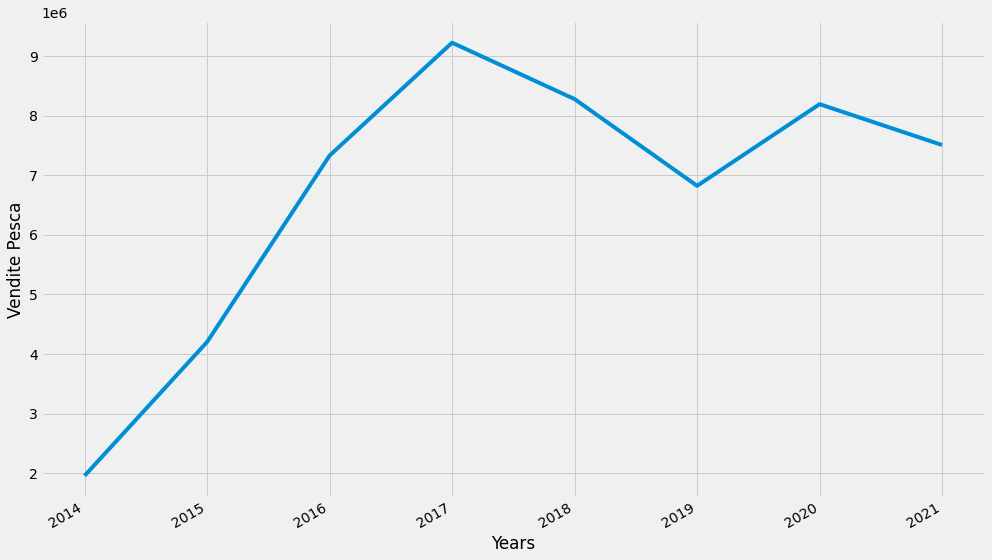

In [88]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['year'], pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

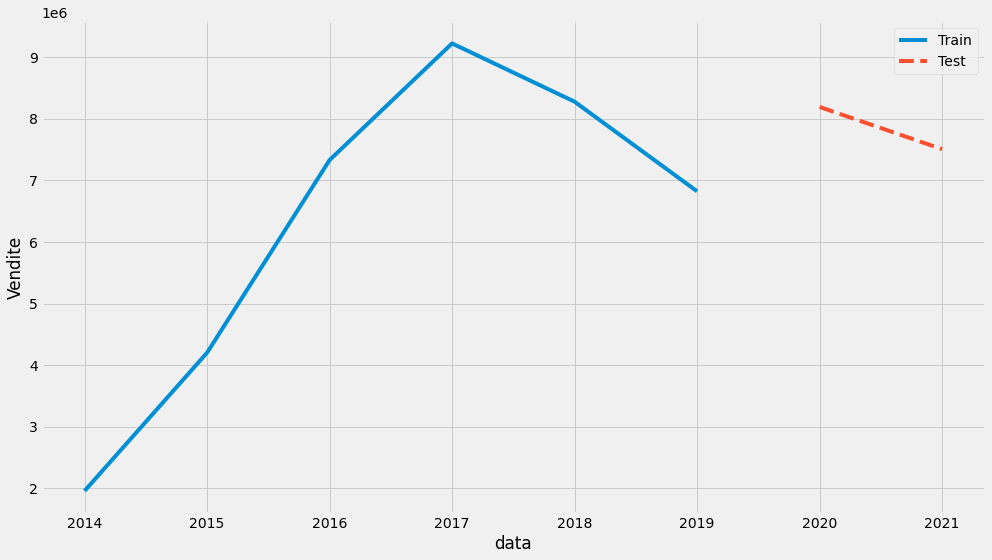

In [89]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [90]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


In [91]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2020-01-01  8.960398e+06  6.616985e+06  1.247569e+07  8.960398e+06   
1 2021-01-01  1.004920e+07  8.733148e+06  1.469011e+07  1.004920e+07   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  8.960398e+06    6.608337e+05          6.608337e+05          6.608337e+05   
1  1.004920e+07    1.688493e+06          1.688493e+06          1.688493e+06   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  6.608337e+05  6.608337e+05  6.608337e+05                   0.0   
1  1.688493e+06  1.688493e+06  1.688493e+06                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  9.621232e+06  
1                         0.0                         0.0  1.173769e+07

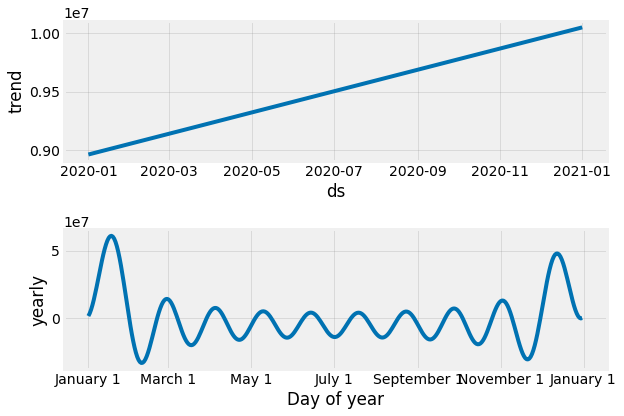

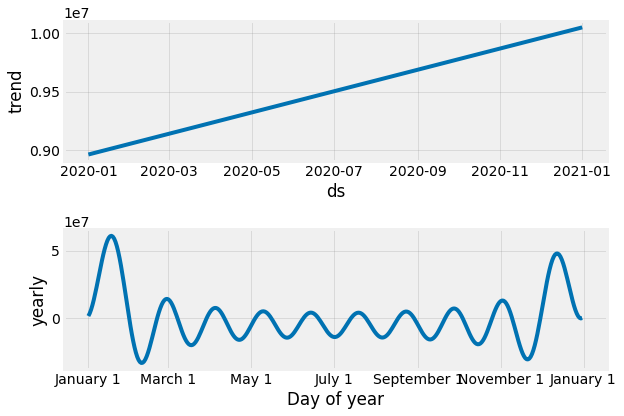

In [92]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 36.91812296540778**
**MAE = 2830917.551147114**

In [93]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 36.91812296540778
MAE: 2830917.551147114


##Trimestrale

In [94]:
pesca = pd.read_csv('casual_trimestrale.csv', parse_dates=['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year    revenue
30          30 2021-09-30  543018.66
31          31 2021-12-31  664677.44

**Dividiamo in test e train set** 

In [95]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) 
pesca_test

Unnamed: 0         ds          y
26          26 2020-09-30  674152.55
27          27 2020-12-31  789520.75
28          28 2021-03-31  985770.75
29          29 2021-06-30  709238.48
30          30 2021-09-30  543018.66
31          31 2021-12-31  664677.44

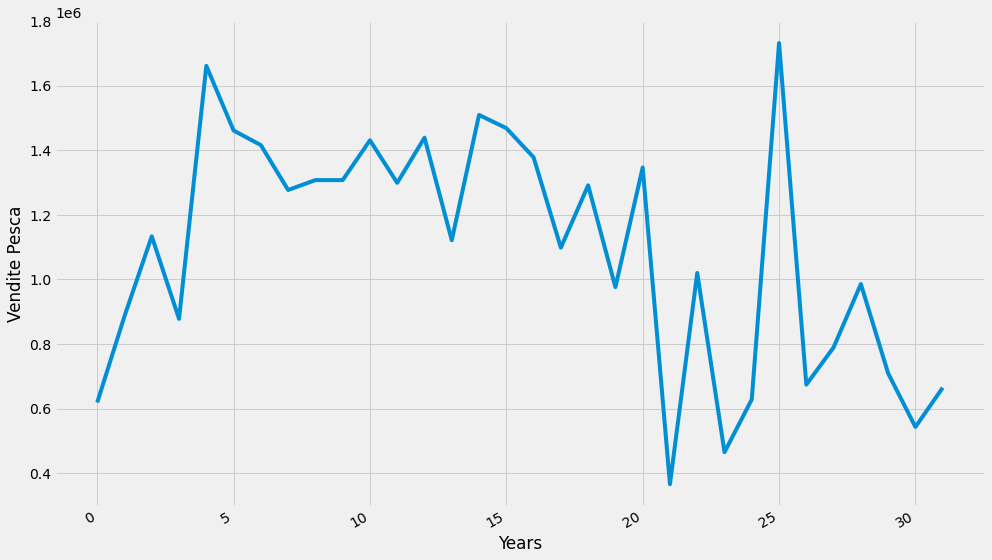

In [96]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

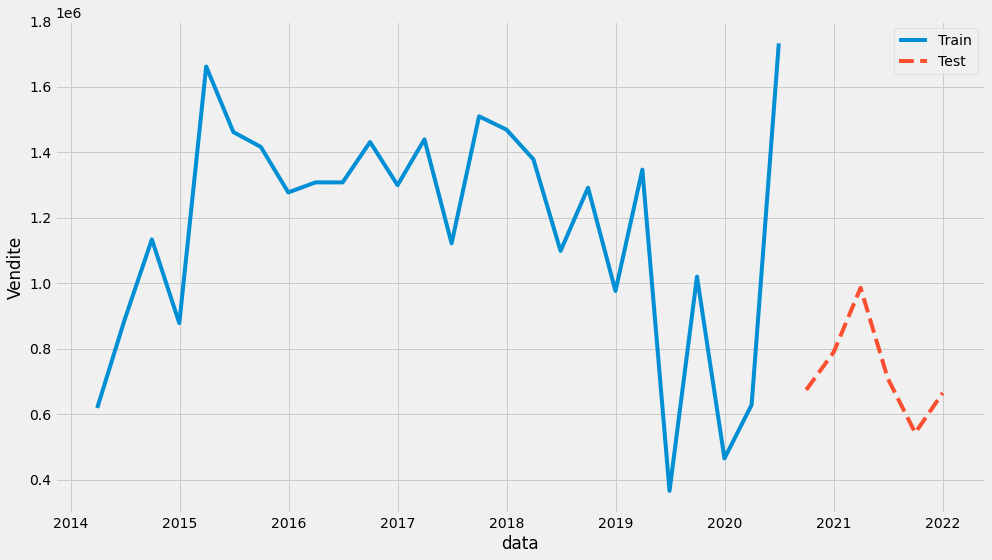

In [97]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [98]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4)
my_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [99]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds          trend     yhat_lower    yhat_upper    trend_lower  \
0 2020-09-30  156227.247015  667914.323166  1.504768e+06  156227.246675   
1 2020-12-31  147293.108661  639586.799839  1.520134e+06  147293.107427   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  156227.247242   944416.415370         944416.415370         944416.415370   
1  147293.109716   938602.458384         938602.458384         938602.458384   

        monthly  monthly_lower  monthly_upper        yearly  yearly_lower  \
0 -2.571423e+06  -2.571423e+06  -2.571423e+06  3.515840e+06  3.515840e+06   
1 -2.613375e+06  -2.613375e+06  -2.613375e+06  3.551977e+06  3.551977e+06   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  3.515840e+06                   0.0                         0.0   
1  3.551977e+06                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  1.100644e+06  
1                         0.0  1.085896e+06

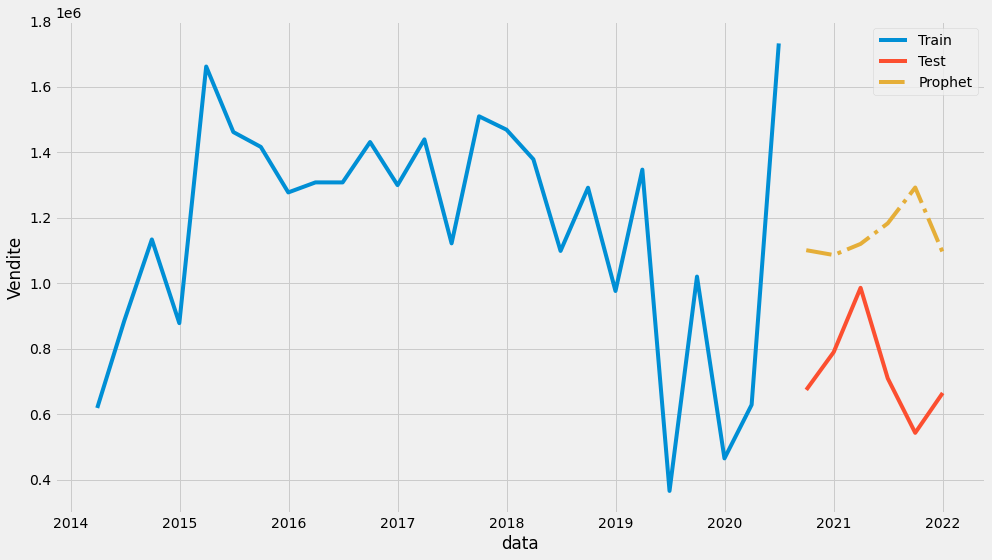

In [100]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

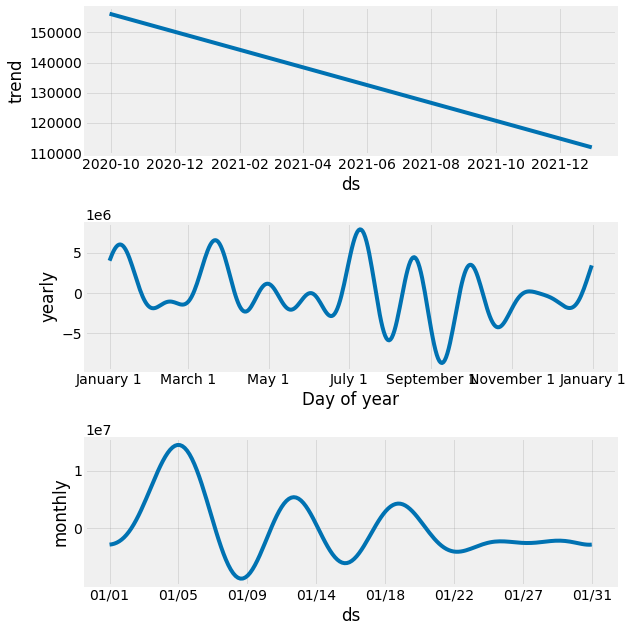

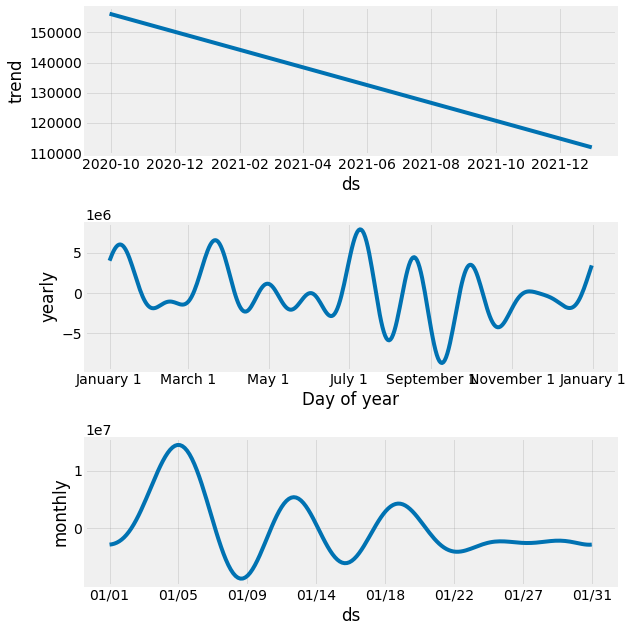

In [101]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 63.939134048954**
**MAE = 418072.08859253797**

In [102]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 63.939134048954
MAE: 418072.08859253797


##Mensile

In [103]:
pesca = pd.read_csv('casual_mensile.csv').rename(columns={'Datetime':'year', 'totale':'revenue'})
pesca['year'] = pd.to_datetime(pesca['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year    revenue
94          94 2021-11-30  249497.74
95          95 2021-12-31  215405.71

**Dividiamo in test e train set** 

In [104]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

Unnamed: 0         ds          y
77          77 2020-06-30  509121.69
78          78 2020-07-31  186785.32
79          79 2020-08-31  259979.55
80          80 2020-09-30  227387.68
81          81 2020-10-31  232932.72
82          82 2020-11-30  281042.27
83          83 2020-12-31  275545.76
84          84 2021-01-31  527328.22
85          85 2021-02-28  215185.48
86          86 2021-03-31  243257.05
87          87 2021-04-30  171086.47
88          88 2021-05-31  364878.76
89          89 2021-06-30  173273.25
90          90 2021-07-31  230836.03
91          91 2021-08-31  146709.43
92          92 2021-09-30  165473.20
93          93 2021-10-31  199773.99
94          94 2021-11-30  249497.74
95          95 2021-12-31  215405.71

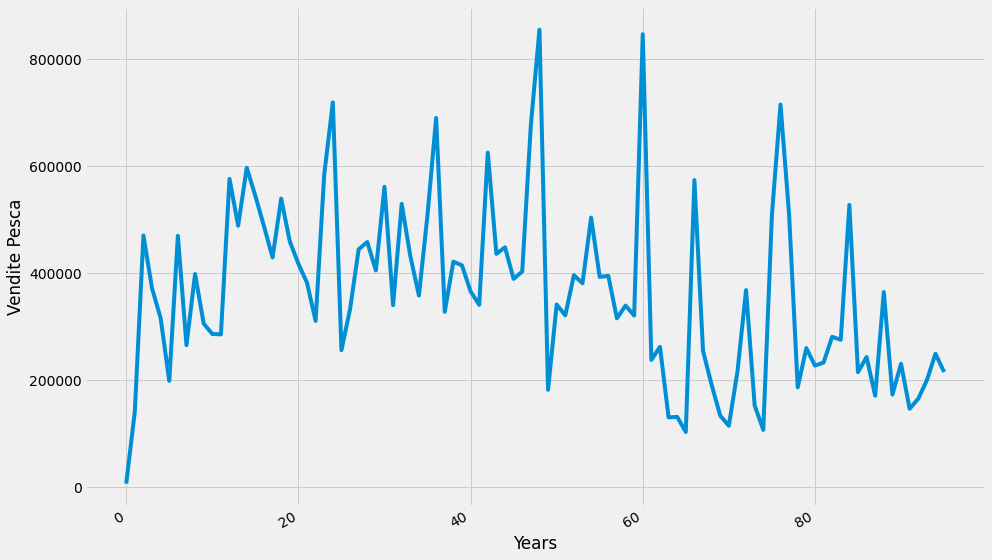

In [105]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

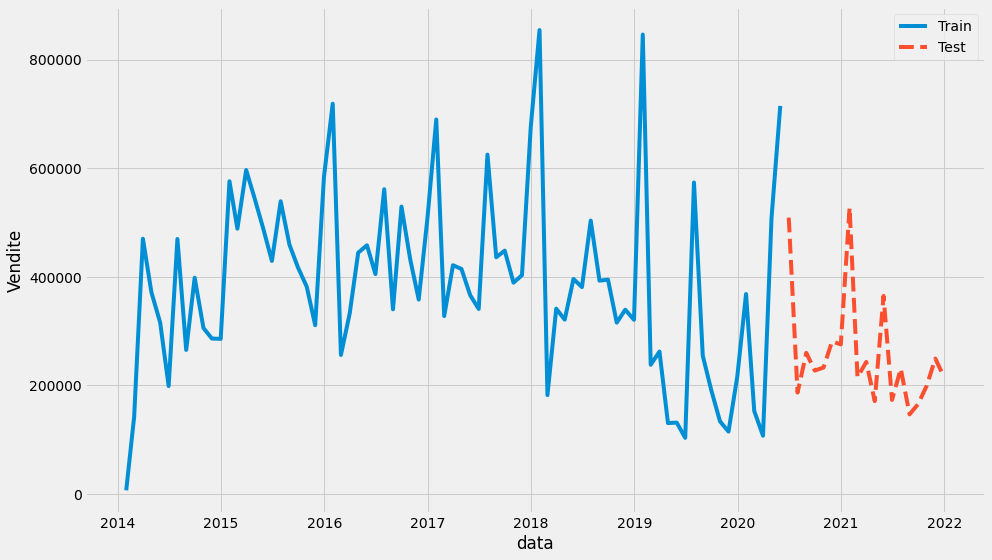

In [106]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [107]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4, weekly_seasonality=True)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds          trend    yhat_lower     yhat_upper    trend_lower  \
0 2020-06-30  353125.461910  35279.658458  505025.965445  353125.461910   
1 2020-07-31  351966.472133  70076.706893  575062.157251  351965.788094   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  353125.46191   -77535.786842         -77535.786842         -77535.786842   
1  351967.08930   -35724.201169         -35724.201169         -35724.201169   

         weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0   -467.907912   -467.907912   -467.907912 -77067.878930 -77067.878930   
1 -92283.295210 -92283.295210 -92283.295210  56559.094041  56559.094041   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -77067.878930                   0.0                         0.0   
1  56559.094041                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0  275589.675068  
1                         0.0  316242.270964

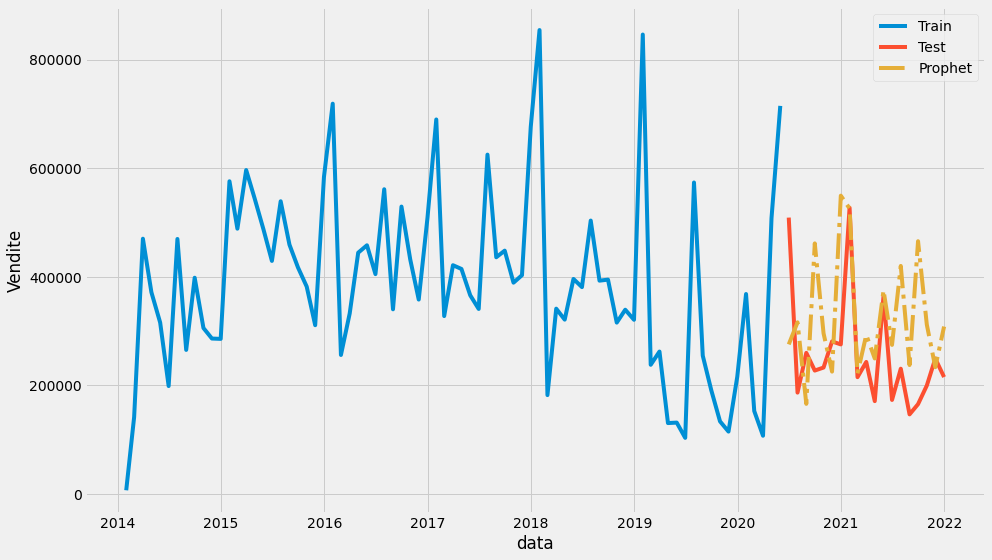

In [109]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

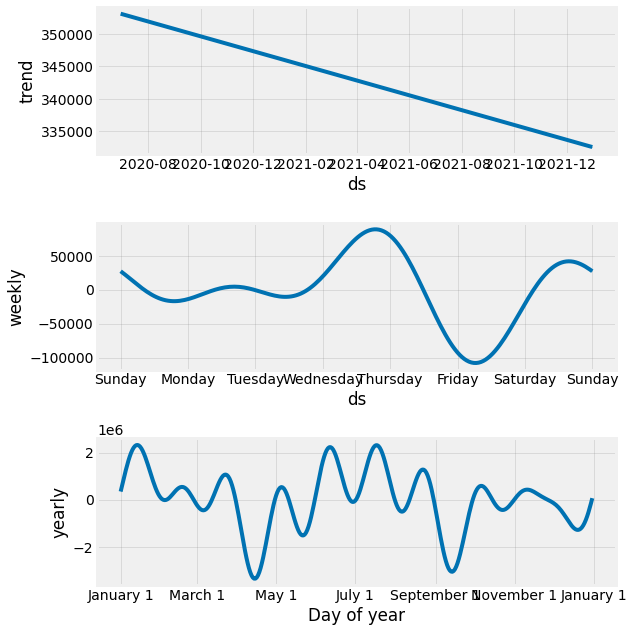

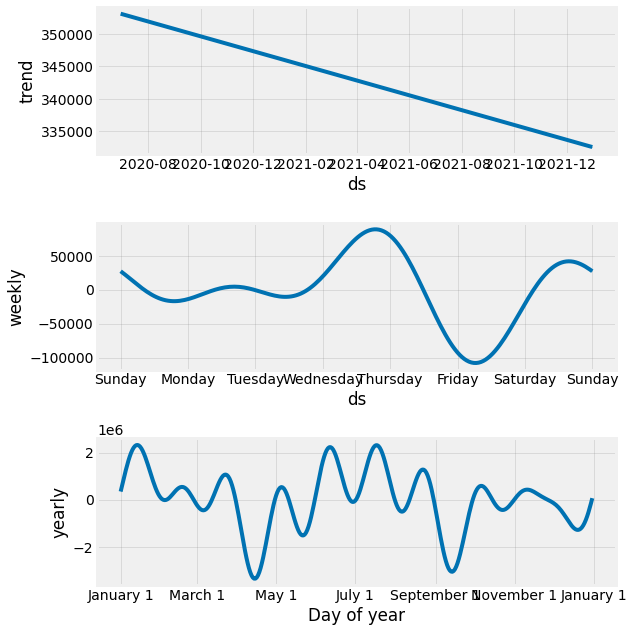

In [110]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 50.67996864369775**
**MAE = 112303.47062983594**

In [111]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 50.67996864369775
MAE: 112303.47062983594


##Settimanale

In [112]:
pesca = pd.read_csv ('casual_settimanale.csv', parse_dates=['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year   revenue
415         415 2021-12-19  64517.93
416         416 2021-12-26   8168.99

**Dividiamo in test e train set** 

In [113]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) 
pesca_test

Unnamed: 0         ds          y
334         334 2020-05-31  116597.62
335         335 2020-06-07  126904.24
336         336 2020-06-14  175230.72
337         337 2020-06-21  129054.13
338         338 2020-06-28   70592.41
..          ...        ...        ...
412         412 2021-11-28  139666.95
413         413 2021-12-05   46987.92
414         414 2021-12-12   77640.87
415         415 2021-12-19   64517.93
416         416 2021-12-26    8168.99

[83 rows x 3 columns]

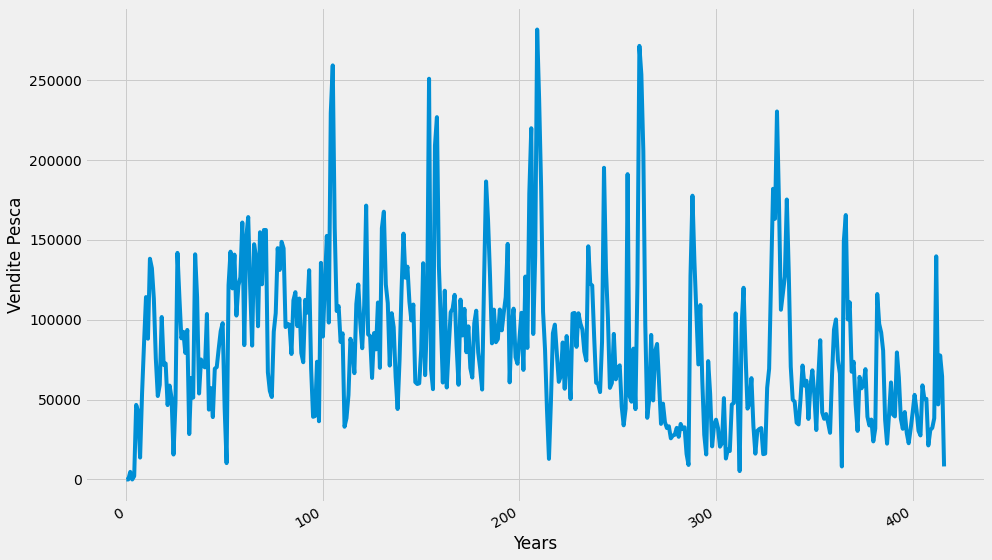

In [114]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

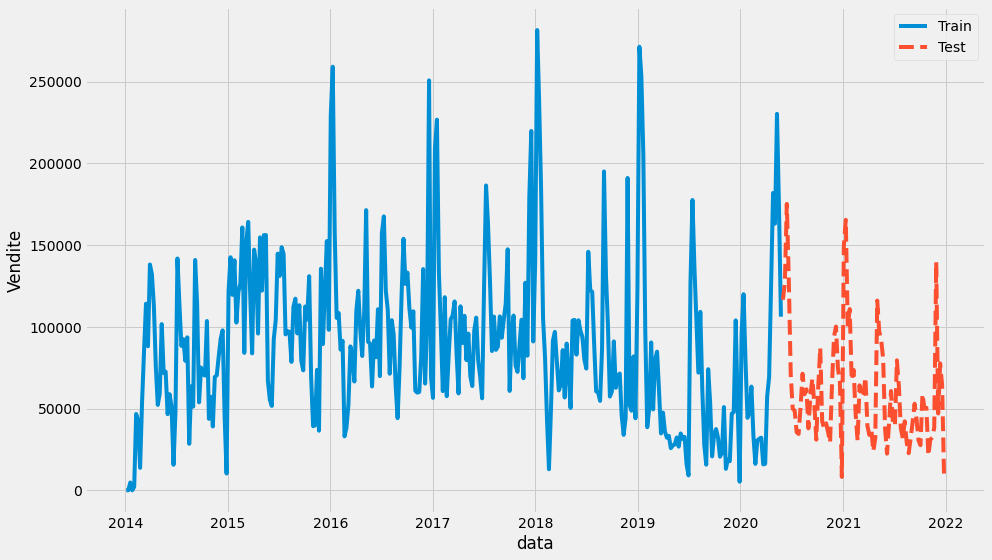

In [115]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [116]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4, daily_seasonality=True)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [117]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds        trend    yhat_lower     yhat_upper  trend_lower  \
0 2020-05-31 -7625.074230  -4666.511779  104304.489913 -7625.074230   
1 2020-06-07 -7860.651593 -13266.362514   93701.123026 -7860.651593   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0 -7625.074230    57549.269176          57549.269176          57549.269176   
1 -7860.651593    45614.149695          45614.149695          45614.149695   

          daily   daily_lower   daily_upper        yearly  yearly_lower  \
0  72286.972018  72286.972018  72286.972018 -14737.702842 -14737.702842   
1  72286.972018  72286.972018  72286.972018 -26672.822323 -26672.822323   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -14737.702842                   0.0                         0.0   
1 -26672.822323                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  49924.194946  
1                         0.0  37753.498103

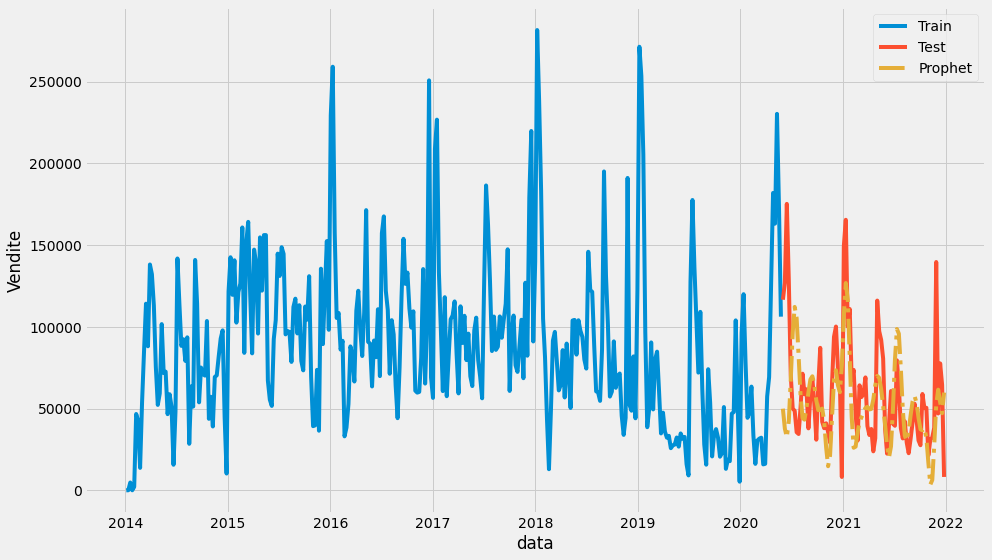

In [118]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

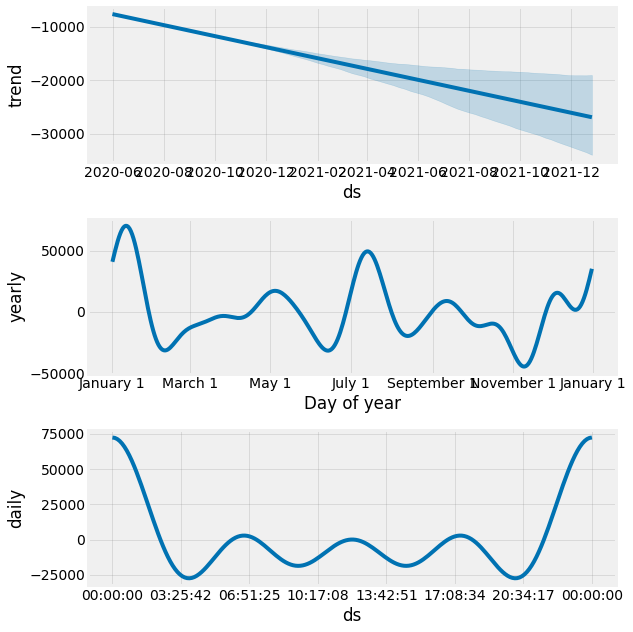

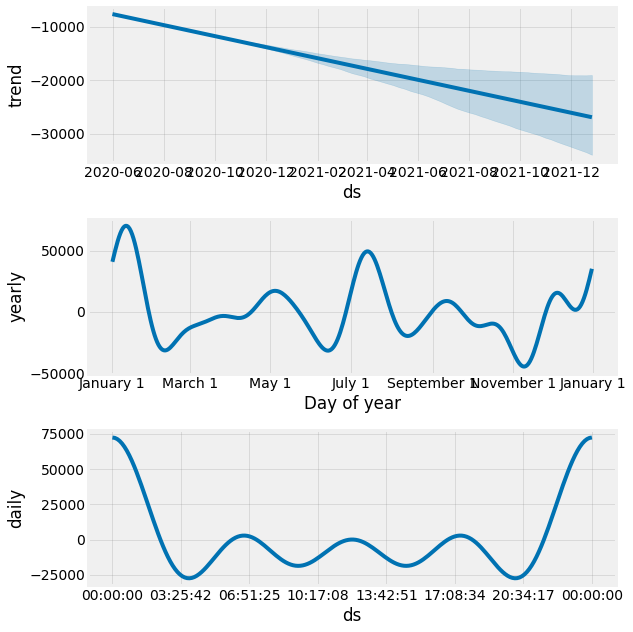

In [119]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 59.92280459247847**
**MAE = 26009.41461243502**

In [120]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 59.92280459247847
MAE: 26009.41461243502
